<a href="https://colab.research.google.com/github/Erick-Meza/Erick-Meza/blob/main/Erick_M_NeuralNetDemoMNIST_SOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 3: Training a model with PyTorch - Handwriting Detection

Welcome to day 3 of IOAI Canada training!

Today, we will be training our first neural network model using PyTorch. Using the MNIST database, we will create and train a model that will detect handwritten digits from 0-9.

The parts of the code you will write will be marked with "TO-DO". Ensure you pay attention to the lecture on how to write the code.

**Please make a copy of this notebook so your changes are saved.**

If you have any questions, do not hesitate to ask questions in the zoom call.

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch import nn, optim

## Step 1: Downloading and preparing the data

Objectives:
- Setup two datasets - one for training and one for validation
- Creating dataloaders for both datasets to streamline training and validation

In [2]:
# TO-DO: Download the MNIST dataset and create dataloaders for training and testing.

batch_size = 100

# Download the MNIST datasets, and assign them to a training set and testing set
train_dataset = datasets.MNIST(
    root='train', # The path where the files are stored
    train=True, # Are we training or testing? Seperate data is used for either case.
    transform=transforms.ToTensor(), # Converts the data to a tensor that is readable by PyTorch
    download=True # Indicates we need to download the data
)

test_dataset = datasets.MNIST(
    root='test',
    # TO-DO: fill in the rest of the parameters here
    train=False, # Are we training or testing? Seperate data is used for either case.
    transform=transforms.ToTensor(), # Converts the data to a tensor that is readable by PyTorch
    download=True # Indicates we need to download the data
)

# Create dataloaders for training and testing, so we can easily load data when training and testing
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, # The dataset used for this loader
    batch_size=batch_size, # The batch size used (more details later)
    shuffle=True # Shuffles the data
)

# TO-DO: create a new loader called test_loader that loads the data from test_dataset
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, # The dataset used for this loader
    batch_size=batch_size, # The batch size used (more details later)
    shuffle=True # Shuffles the data
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.79MB/s]
100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.45MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]


## Step 2: Display an image

To ensure that our dataset works, we will use the matplotlib library to display one of the images in the dataset.

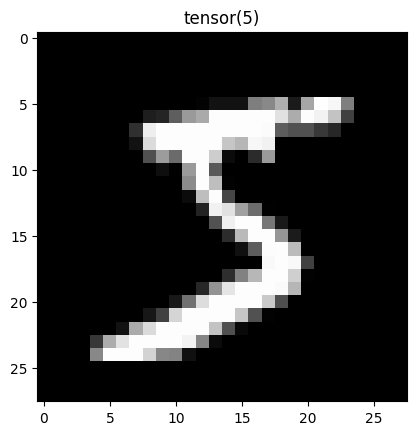

In [3]:
# TO-DO: Display one image from the training dataset using matplotlib.
plt.imshow(train_dataset.data[0], cmap='gray') # cmap = color map
plt.title(train_dataset.targets[0])
plt.show()

## Step 3: Defining the model, loss function, and optimizer

Here, we need to specify the device that will be used (GPU or CPU)

We will create a very simple neural network, passing each pixel in the image (28x28) as an input. The network has an output of 10, correspoinding to the 10 digits.

The loss function dictates how the loss, or how correct/incorrect the model is, is calculated.

The optmizer uses the calculated loss, and modifies the weights of the neural network to reduce this loss.

In [4]:
# TO-DO: Initialize the architecture of the device, model, loss function and optimizer
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = nn.Sequential(nn.Linear(28*28, 28), nn.Linear(28,10)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.005)

## Step 4: Training the model

For each batch of images:
- Flatten each image, so that it becomes an array of pixels that can be fed into the network
- Get the current model's predictions for each image
- Determine how well the model did by calculating its loss. The smaller the loss, the better the model.
- Backpropagate the loss and modify the weights of the network.

These steps are repeated for every batch of images (in our case, every 100 images, the loss is calculated and weights are changed).

Every time the program iterates through the entire dataset, it goes through *one* epoch. Here, we will iterate through the dataset 10 times.

In [5]:
# Training the model
# TO-DO: Fill in the blanks

# Initial settings - number of epochs
num_epochs = 10

# Loop through the entire dataset num_epochs times
for epoch in range(num_epochs):

  model.train() # Set the model to train mode

  for i, data in enumerate(train_loader): # Loop through for every batch in _______

    # Seperate the data into images and labels
    images, labels = data

    # Send the image/label tensors to the GPU
    images = images.to(device)
    labels = labels.to(device)

    # TO-DO: The following 6 lines are out of order. Re-arrange them so that they are in order.
    # Correct order of operations
    images = images.view(images.size(0), -1) # Reshape images before forward pass

    pred = model(images) # Perform the forward pass
    loss = loss_fn(pred, labels) # Calculate the loss
    loss.backward() # Calculate the gradients
    optimizer.step() # Update the model's parameters

    optimizer.zero_grad() # Zero out gradients before calculating new ones

    # TO-DO: Add to this code so that for every 100 batches, the current epoch, batch and loss is printed.
    if (i+1) % 100 == 0:
      print(f"Epoch: {epoch+1}/{num_epochs}, Batch: {i+1}, Loss: {loss.item():}")


Epoch: 1/10, Batch: 100, Loss: 2.1316308975219727
Epoch: 1/10, Batch: 200, Loss: 1.9357924461364746
Epoch: 1/10, Batch: 300, Loss: 1.7967420816421509
Epoch: 1/10, Batch: 400, Loss: 1.5647168159484863
Epoch: 1/10, Batch: 500, Loss: 1.4346052408218384
Epoch: 1/10, Batch: 600, Loss: 1.233393669128418
Epoch: 2/10, Batch: 100, Loss: 1.144642949104309
Epoch: 2/10, Batch: 200, Loss: 1.1394274234771729
Epoch: 2/10, Batch: 300, Loss: 0.9881893396377563
Epoch: 2/10, Batch: 400, Loss: 0.8089888691902161
Epoch: 2/10, Batch: 500, Loss: 0.9408512115478516
Epoch: 2/10, Batch: 600, Loss: 0.7489108443260193
Epoch: 3/10, Batch: 100, Loss: 0.6987536549568176
Epoch: 3/10, Batch: 200, Loss: 0.7234793901443481
Epoch: 3/10, Batch: 300, Loss: 0.7138181924819946
Epoch: 3/10, Batch: 400, Loss: 0.6880939602851868
Epoch: 3/10, Batch: 500, Loss: 0.6913455724716187
Epoch: 3/10, Batch: 600, Loss: 0.6261639595031738
Epoch: 4/10, Batch: 100, Loss: 0.6827905774116516
Epoch: 4/10, Batch: 200, Loss: 0.6921890377998352
Ep

## Step 5: Evaluate the model

Now that our model is trained, let's see how well our model performs against a dataset it hasn't seen before - the testing dataset.

Here, we want to compare the model's prediction for the image with the actual image label (so if an image contains the number 9, we want the model to predict a 9)

We calculate the accuracy of each batch using the test_loader, and then evaluate the total accuracy by calculating the average accuracy across all batches.

In [6]:
# Evaluation

model.eval() # Set the model to evaluation mode

with torch.no_grad(): # Let PyTorch know to NOT modify the gradients (used to change weights, we don't want to do that here)

    total_accuracy = 0 # Total accuracy used to calculate average batch accuracy at the end
    for i, data in enumerate(test_loader): # Loop through for every batch in test_loader

        # TO-DO: Output the model prediction for this batch into a variable called test_output. Refer to step 4 on how to do this.
         # Send the image/label tensors to the GPU
        images = images.to(device)
        labels = labels.to(device)
        images = images.view(images.size(0), -1)
        # TO-DO: Output the model prediction for this batch into a variable called test_output.
        test_output = model(images)

        pred_y = torch.max(test_output, 1)[1].data.squeeze() # Get the class which has the highest probability (what number the model thinks the image corresponds to)
        batch_accuracy = (pred_y == labels).sum().item() / float(labels.size(0)) # Determines the accuracy of the model for this batch
        total_accuracy += batch_accuracy # Adds to the concurent accuracy
        i += 1

    # TO-DO: Complete this line so that it calculates the average accuracy across all batches
    accuracy = total_accuracy / len(test_loader)

print(f"Test Accuracy of the model on the 10000 test images: {accuracy:.3f}")


Test Accuracy of the model on the 10000 test images: 0.900


## Step 6: Our own handwriting data

Now, we will import our own handwriting, and see if the model can recognize it.

To do this, you need to create a 28x28 image with a black background using Microsoft Paint, or any other software.

Then, you will need to mount your Google Drive so that Google Colab can access files on your drive. Pay attention to the lecture on how to do this.

Afterwards, open the image, preprocess it (convert to grayscale and make it to a tensor) so it can be read by our model, and output its prediction.

3


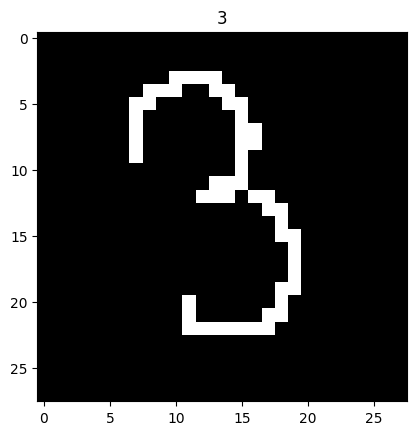

In [10]:
# Import custom image
import os
from PIL import Image
import torchvision.transforms as transforms

# Open the image (TO-DO: Put the link to the image here)
image_path = "/content/Gotta be number one/Three.png"
image = Image.open(image_path)

# Set model to evaluation mode
model.eval()

# Define a transform to convert the image to a tensor (TO-DO: Fill in the blanks)
preprocess = transforms.Compose([
    transforms.Grayscale(),  # Convert the image to grayscale
    transforms.ToTensor(),   # Convert the image to a tensor
])

# Apply the transform to the image
image_tensor = preprocess(image)
image_tensor = image_tensor.view(image_tensor.size(0), -1) # Reshape to (batch_size, input_features)
with torch.no_grad():
# TO-DO: From this new image_tensor, complete the code so that the model predicts the number of thiss image_tensor.
  image_tensor = image_tensor.to(device)  # Send tensor to device (GPU or CPU)
  output = model(image_tensor)
  pred = torch.max(output, 1)[1].item()
print(pred);
plt.imshow(image, cmap='gray') # cmap = color map
plt.title(pred)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Step 7: Save & Load our model

We don't want to train our model every time we open up our program. Saving our model allows us to retrieve this model at a later time and use it.

IMPORTANT: When loading the model, the architecture of the model must be defined first before loading.

In [ ]:
# TO-DO: Save the model to Google Drive
torch.save(model.state_dict(), "/content/ioaiModel.pth")

In [ ]:
model = nn.Sequential(nn.Linear(28*28,28), nn.Linear(28, 10)).to(device)
model.load_state_dict(torch.load("/content/ioaiModel.pth"))